<a href="https://colab.research.google.com/github/shivam0032/Stock-Market-/blob/main/Dengue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Dengue India - Machine learning model - Polynomial Regression**


# New Section
# 1. Dengue Cases Prediction (Regression)
Target (Output Variable): cases
The goal is to predict the number of dengue cases as a continuous variable.

Features (Input Variables): Weather and environmental variables:

tempmax, tempmin, temp (Temperatures)
feelslikemax, feelslikemin, feelslike (Feels-like temperatures)


dew (Dew point)
humidity (Humidity)
precip, precipprob, precipcover (Rain-related variables)
windspeed, winddir (Wind speed and direction)
sealevelpressure (Sea level pressure)
cloudcover (Cloud cover)
visibility (Visibility)
solarradiation, solarenergy (Solar radiation and energy)
uvindex (UV index)
Columns like serial, stations, and conditions may not be directly useful, but conditions could be transformed into a categorical variable with one-hot encoding.

# 2)Suggested Models:

Linear Regression (for a simple baseline model)
Random Forest Regressor (non-linear approach, good for feature importance)
Gradient Boosting (XGBoost, LightGBM, or CatBoost for better performance)
Neural Networks (suitable for more complex scenarios)
Identifying High-Risk Periods (Classification)
Target (Output Variable): labels
Binary classification where:

High risk: Label = 1 (high-risk periods with a significant number of cases)
Low risk: Label = 0 (low-risk periods with fewer cases)
Features (Input Variables): Same weather-related features as above.

# 3) Logistic Regression (for baseline binary classification)
Random Forest Classifier (interpretable and effective for smaller datasets)
Gradient Boosting (e.g., XGBoost, LightGBM, or CatBoost for high performance)
Neural Networks (suitable for complex and larger datasets)
Common Steps for Both Problems¶
Data Preprocessing:

# 4)Handle missing values:
 Replace missing data with the mean/median or use imputation techniques.

# 5)Transform categorical variables:
  For instance, use one-hot encoding for conditions.
Feature Scaling: Normalize numerical variables for models that are sensitive to scale (e.g., neural networks).
Remove outliers (if necessary): Focus on weather-related variables to avoid skewed results.

# 6)Feature Engineering: Add derived features, such as:
Moving averages of precipitation over the last weeks
Heat index (combining temperature and humidity)
Wind chill factor, if applicable

#7)Data Splitting:
Split data into training (70%), validation (15%), and test (15%) sets.
Maintain the temporal order of data to prevent data leakage.
Model Training and Evaluation:

# 8)For regression:
 Use metrics like MAE, RMSE, and R² to evaluate model performance.

#9)For classification:
Evaluate using AUC-ROC, F1-score, precision, and recall to balance the trade-off between false positives and false negatives.
Interpretation and Explainability:

#10)Utilize tools like SHAP or feature importance to identify the most impactful features.
For example:
How do temperature and humidity impact predictions?
Are precipitation and solar radiation strongly correlated with dengue outbreaks?

In [1]:
!pip install watermark


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.6 MB/s eta 0:00:00


In [3]:
# System libraries
import re
import unicodedata
import itertools
from datasets import Dataset

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# SQL
import sqlite3

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
# Allow all columns to be displayed
pd.set_option('display.max_columns', 64)

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions


Python version in this Jupyter Notebook: 3.12.12
Author: Library versions

datasets  : 4.0.0
matplotlib: 3.10.0
numpy     : 2.0.2
pandas    : 2.2.2
platform  : 1.0.8
plotly    : 5.24.1
re        : 2.2.1
seaborn   : 0.13.2
sqlite3   : 2.6.0
watermark : 2.5.1



In [4]:
df = pd.read_csv("/content/Dengue .csv")
df

serial    tempmax    tempmin       temp  feelslikemax  feelslikemin  \
0         0  34.053151  24.478082  28.709863     39.757808     25.317808   
1         1  34.086179  25.694309  29.464228     41.338211     28.140650   
2         2  34.573984  25.417886  29.526829     40.464228     26.560163   
3         3  33.020325  25.080488  28.727642     37.878049     26.193496   
4         4  30.660976  24.230894  26.774797     36.586992     24.263415   
..      ...        ...        ...        ...           ...           ...   
597     597  32.300000  24.400000  28.500000     35.900000     24.400000   
598     598  32.700000  26.400000  29.300000     36.300000     26.400000   
599     599  33.000000  26.300000  29.800000     40.500000     26.300000   
600     600  35.100000  26.800000  30.600000     42.900000     29.100000   
601     601  34.000000  26.300000  30.200000     38.100000     26.300000   

     feelslike        dew   humidity     precip  precipprob  precipcover  \
0    32.306301  22.971233  73.508219   2.921726   44.657534     4.360932   
1    34.423577  23.484553  72.066667   3.783415   39.837398     2.676748   
2    33.085366  22.580488  69.424390   3.065854   33.333333     2.337805   
3    31.772358  21.752033  69.297561   6.025203   37.398374     2.676667   
4    28.943902  24.214634  86.652033  23.336585   96.747967    15.616992   
..         ...        ...        ...        ...         ...          ...   
597  31.200000  23.300000  75.000000   0.000000    0.000000     0.000000   
598  32.500000  22.600000  68.500000   0.000000    0.000000     0.000000   
599  34.500000  23.900000  71.100000   0.000000    0.000000     0.000000   
600  35.100000  23.300000  65.900000   0.000000    0.000000     0.000000   
601  33.100000  21.500000  60.400000   0.000000    0.000000     0.000000   

     snow  snowdepth  windspeed     winddir  sealevelpressure  cloudcover  \
0     0.0        0.0  15.678356  175.595342       1007.911781   50.747945   
1     0.0        0.0  14.574797  158.349593       1003.533333   48.313821   
2     0.0        0.0  14.978049  202.621138       1005.731707   55.621138   
3     0.0        0.0  16.504878  183.544715       1003.359350   50.208130   
4     0.0        0.0  19.546341  224.030081       1009.995935   45.542276   
..    ...        ...        ...         ...               ...         ...   
597   0.0        0.0  17.100000  159.800000       1008.900000   50.400000   
598   0.0        0.0  16.600000  233.000000       1010.400000   50.500000   
599   0.0        0.0  19.000000  344.400000       1010.800000   30.500000   
600   0.0        0.0  14.700000   81.300000       1009.700000   32.700000   
601   0.0        0.0  17.800000   79.200000       1008.700000   46.500000   

     visibility  solarradiation  solarenergy   uvindex  conditions  stations  \
0      3.789863      208.097808    17.973699  7.232877    2.558904  1.197260   
1      2.884553      222.926016    19.246341  7.504065    1.658537  0.991870   
2      4.242276      229.413008    19.802439  7.829268    1.910569  1.170732   
3      2.991057      225.421951    19.480488  7.593496    1.300813  0.146341   
4      3.886992      176.598374    15.261789  6.186992    0.967480  3.951220   
..          ...             ...          ...       ...         ...       ...   
597    3.100000      252.500000    21.900000  9.000000    1.000000  1.000000   
598    3.100000      242.700000    20.900000  8.000000    1.000000  1.000000   
599    3.100000      195.300000    16.900000  8.000000    1.000000  1.000000   
600    3.300000      187.600000    16.000000  7.000000    1.000000  1.000000   
601    3.900000      136.200000    11.700000  5.000000    1.000000  1.000000   

       cases  labels  
0     4925.0  normal  
1     5077.0  normal  
2     7579.0  normal  
3    13706.0  normal  
4       82.0  normal  
..       ...     ...  
597   6729.0  normal  
598  10541.0  normal  
599   6396.0  normal  
600  10883.0  normal  
601   7311.0  normal  

[602 rows x 26 c

In [5]:
df.head()


serial    tempmax    tempmin       temp  feelslikemax  feelslikemin  \
0       0  34.053151  24.478082  28.709863     39.757808     25.317808   
1       1  34.086179  25.694309  29.464228     41.338211     28.140650   
2       2  34.573984  25.417886  29.526829     40.464228     26.560163   
3       3  33.020325  25.080488  28.727642     37.878049     26.193496   
4       4  30.660976  24.230894  26.774797     36.586992     24.263415   

   feelslike        dew   humidity     precip  precipprob  precipcover  snow  \
0  32.306301  22.971233  73.508219   2.921726   44.657534     4.360932   0.0   
1  34.423577  23.484553  72.066667   3.783415   39.837398     2.676748   0.0   
2  33.085366  22.580488  69.424390   3.065854   33.333333     2.337805   0.0   
3  31.772358  21.752033  69.297561   6.025203   37.398374     2.676667   0.0   
4  28.943902  24.214634  86.652033  23.336585   96.747967    15.616992   0.0   

   snowdepth  windspeed     winddir  sealevelpressure  cloudcover  visibility  \
0        0.0  15.678356  175.595342       1007.911781   50.747945    3.789863   
1        0.0  14.574797  158.349593       1003.533333   48.313821    2.884553   
2        0.0  14.978049  202.621138       1005.731707   55.621138    4.242276   
3        0.0  16.504878  183.544715       1003.359350   50.208130    2.991057   
4        0.0  19.546341  224.030081       1009.995935   45.542276    3.886992   

   solarradiation  solarenergy   uvindex  conditions  stations    cases  \
0      208.097808    17.973699  7.232877    2.558904  1.197260   4925.0   
1      222.926016    19.246341  7.504065    1.658537  0.991870   5077.0   
2      229.413008    19.802439  7.829268    1.910569  1.170732   7579.0   
3      225.421951    19.480488  7.593496    1.300813  0.146341  13706.0   
4      176.598374    15.261789  6.186992    0.967480  3.951220     82.0   

   labels  
0  normal  
1  normal  
2  normal  
3  normal  
4  normal

In [6]:
df.tail()


serial  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
597     597     32.3     24.4  28.5          35.9          24.4       31.2   
598     598     32.7     26.4  29.3          36.3          26.4       32.5   
599     599     33.0     26.3  29.8          40.5          26.3       34.5   
600     600     35.1     26.8  30.6          42.9          29.1       35.1   
601     601     34.0     26.3  30.2          38.1          26.3       33.1   

      dew  humidity  precip  precipprob  precipcover  snow  snowdepth  \
597  23.3      75.0     0.0         0.0          0.0   0.0        0.0   
598  22.6      68.5     0.0         0.0          0.0   0.0        0.0   
599  23.9      71.1     0.0         0.0          0.0   0.0        0.0   
600  23.3      65.9     0.0         0.0          0.0   0.0        0.0   
601  21.5      60.4     0.0         0.0          0.0   0.0        0.0   

     windspeed  winddir  sealevelpressure  cloudcover  visibility  \
597       17.1    159.8            1008.9        50.4         3.1   
598       16.6    233.0            1010.4        50.5         3.1   
599       19.0    344.4            1010.8        30.5         3.1   
600       14.7     81.3            1009.7        32.7         3.3   
601       17.8     79.2            1008.7        46.5         3.9   

     solarradiation  solarenergy  uvindex  conditions  stations    cases  \
597           252.5         21.9      9.0         1.0       1.0   6729.0   
598           242.7         20.9      8.0         1.0       1.0  10541.0   
599           195.3         16.9      8.0         1.0       1.0   6396.0   
600           187.6         16.0      7.0         1.0       1.0  10883.0   
601           136.2         11.7      5.0         1.0       1.0   7311.0   

     labels  
597  normal  
598  normal  
599  normal  
600  normal  
601  normal

In [7]:
df.shape


(602, 26)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial            602 non-null    int64  
 1   tempmax           602 non-null    float64
 2   tempmin           602 non-null    float64
 3   temp              602 non-null    float64
 4   feelslikemax      602 non-null    float64
 5   feelslikemin      602 non-null    float64
 6   feelslike         602 non-null    float64
 7   dew               602 non-null    float64
 8   humidity          602 non-null    float64
 9   precip            602 non-null    float64
 10  precipprob        602 non-null    float64
 11  precipcover       602 non-null    float64
 12  snow              602 non-null    float64
 13  snowdepth         602 non-null    float64
 14  windspeed         602 non-null    float64
 15  winddir           602 non-null    float64
 16  sealevelpressure  602 non-null    float64
 1

In [9]:
df.dtypes


serial                int64
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
snow                float64
snowdepth           float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex             float64
conditions          float64
stations            float64
cases               float64
labels               object
dtype: object

In [10]:
df.isnull().sum()


serial              0
tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
snow                0
snowdepth           0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
solarradiation      0
solarenergy         0
uvindex             0
conditions          0
stations            0
cases               0
labels              0
dtype: int64

In [11]:
df.describe().T

count         mean          std        min         25%  \
serial            602.0   300.500000   173.926709   0.000000   150.25000   
tempmax           602.0    31.918079     2.737215  25.000000    30.02500   
tempmin           602.0    24.588318     2.727919  12.740000    23.20000   
temp              602.0    27.813181     2.412416  18.820000    26.50000   
feelslikemax      602.0    38.476069     4.776400  25.000000    35.60000   
feelslikemin      602.0    25.613154     4.178797  12.360000    23.20000   
feelslike         602.0    31.485111     4.672951  18.626667    28.10000   
dew               602.0    23.984349     2.668014   4.480000    23.30000   
humidity          602.0    81.254786     9.406354  40.833333    75.80000   
precip            602.0    13.120862    28.463365   0.000000     0.00000   
precipprob        602.0    69.625588    45.539264   0.000000     0.00000   
precipcover       602.0     9.034032    14.201016   0.000000     0.00000   
snow              602.0     0.000000     0.000000   0.000000     0.00000   
snowdepth         602.0     0.000000     0.000000   0.000000     0.00000   
windspeed         602.0    17.599554     8.980189   3.600000    11.20000   
winddir           602.0   191.498693    81.604668   0.500000   134.42500   
sealevelpressure  602.0  1004.690531    41.364967   0.000000  1002.02500   
cloudcover        602.0    59.701192    20.832639   0.000000    47.40000   
visibility        602.0     3.632620     1.890352   0.800000     2.52378   
solarradiation    602.0   199.802695    54.128192  57.900000   160.35000   
solarenergy       602.0    17.251785     4.676051   5.000000    13.90000   
uvindex           602.0     6.877674     1.763928   2.000000     6.00000   
conditions        602.0     1.827725     1.237389   0.000000     1.00000   
stations          602.0     0.859734     0.973575   0.000000     0.00000   
cases             602.0  8502.342193  6780.749627  52.000000  3017.75000   

                          50%           75%           max  
serial             300.500000    450.750000    601.000000  
tempmax             31.700000     33.600000     41.200000  
tempmin             25.000000     26.500000     29.400000  
temp                27.900000     29.448171     33.300000  
feelslikemax        38.400000     41.900000     49.600000  
feelslikemin        25.000000     26.600000     37.900000  
feelslike           31.500000     34.875000     42.900000  
dew                 24.529268     25.475000     28.100000  
humidity            82.800000     88.175000     99.300000  
precip               3.000000     12.589000    302.000000  
precipprob         100.000000    100.000000    100.000000  
precipcover          4.170000      9.705508     83.330000  
snow                 0.000000      0.000000      0.000000  
snowdepth            0.000000      0.000000      0.000000  
windspeed           15.589178     22.775000     92.500000  
winddir            207.300000    252.375000    359.200000  
sealevelpressure  1007.000000   1010.185772   1020.000000  
cloudcover          63.700000     73.200000     97.900000  
visibility           3.200000      4.300000     24.033333  
solarradiation     205.750000    238.800610    318.500000  
solarenergy         17.750000     20.600610     27.700000  
uvindex              7.000000      8.000000     10.000000  
conditions           2.000000      3.000000      4.000000  
stations             1.000000      1.000000      5.000000  
cases             7490.000000  12702.500000  24983.000000

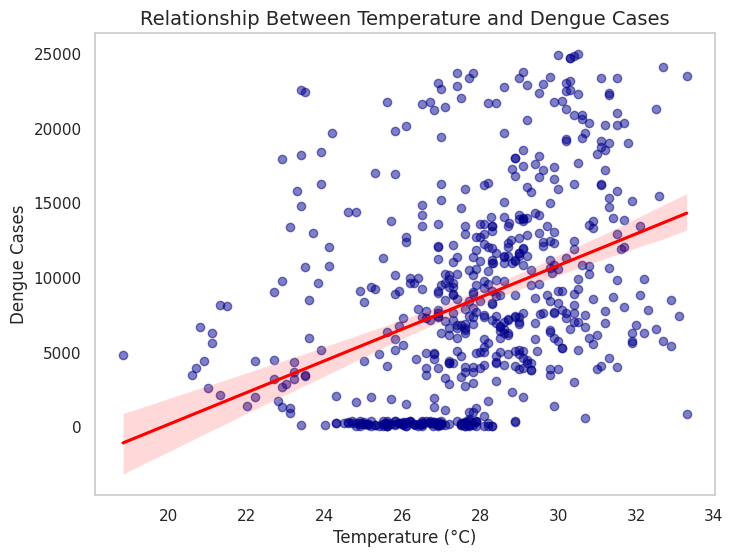

In [12]:
plt.figure(figsize=(8,6))
sns.regplot(x="temp", y="cases", data=df, color="darkblue",
            scatter_kws={"alpha":0.5}, line_kws={"color": "red"})
plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dengue Cases", fontsize=12)
plt.title("Relationship Between Temperature and Dengue Cases", fontsize=14)
plt.grid(False)
plt.show()

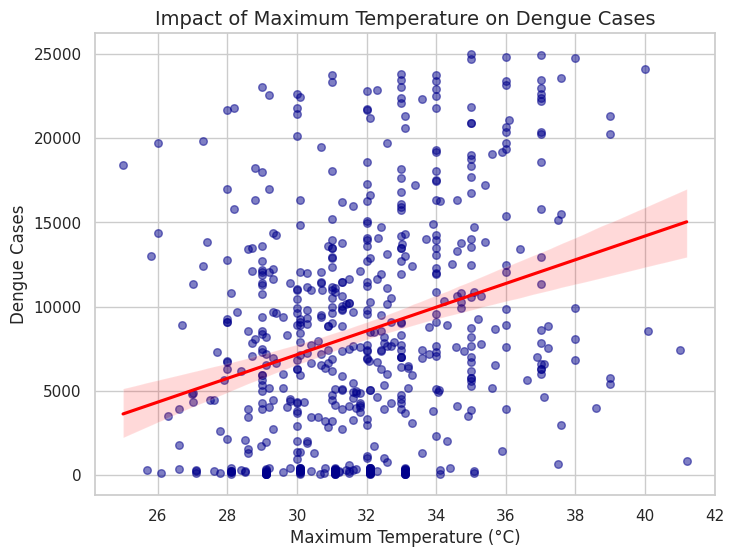

In [13]:
plt.figure(figsize=(8,6))
sns.regplot(x="tempmax", y="cases", data=df, color="darkblue",
            scatter_kws={"alpha":0.5, "s":30}, line_kws={"color": "red"})

plt.xlabel("Maximum Temperature (°C)", fontsize=12)
plt.ylabel("Dengue Cases", fontsize=12)
plt.title("Impact of Maximum Temperature on Dengue Cases", fontsize=14)
plt.grid(True)
plt.show()

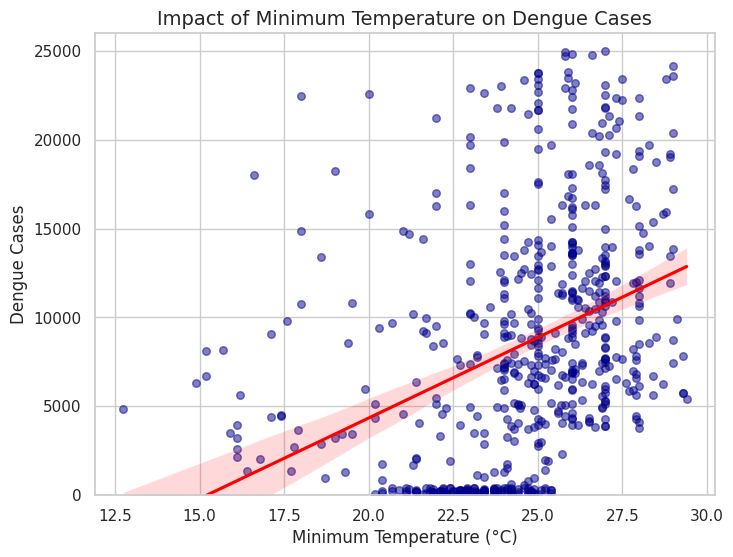

In [14]:
plt.figure(figsize=(8,6))
sns.regplot(x="tempmin", y="cases", data=df, color="darkblue",
            scatter_kws={"alpha":0.5, "s":30}, line_kws={"color": "red"})

plt.xlabel("Minimum Temperature (°C)", fontsize=12)
plt.ylabel("Dengue Cases", fontsize=12)
plt.title("Impact of Minimum Temperature on Dengue Cases", fontsize=14)
plt.grid(True)

# Ajuste para evitar valores negativos no eixo Y
plt.ylim(0, df["cases"].max() + 1000)

plt.show()

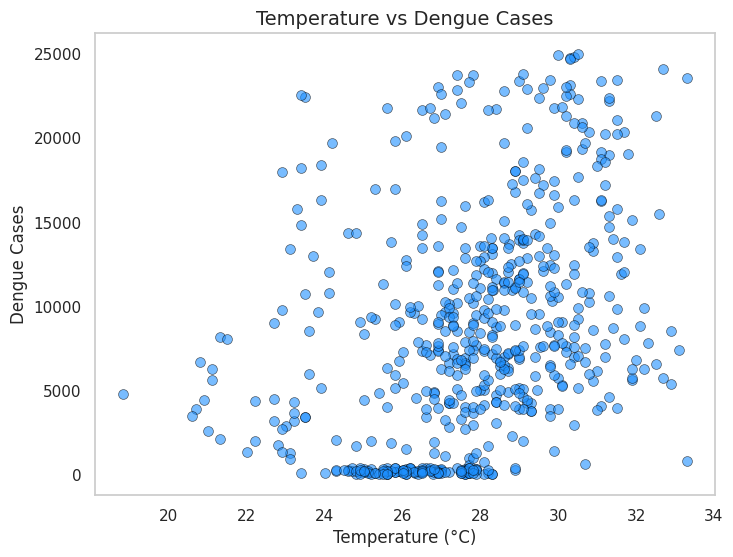

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="temp", y="cases", data=df, color="dodgerblue",
                alpha=0.6, edgecolor="black", linewidth=0.5, s=50)

plt.xlabel("Temperature (°C)", fontsize=12)
plt.ylabel("Dengue Cases", fontsize=12)
plt.title("Temperature vs Dengue Cases", fontsize=14)
plt.grid(False)

plt.show()


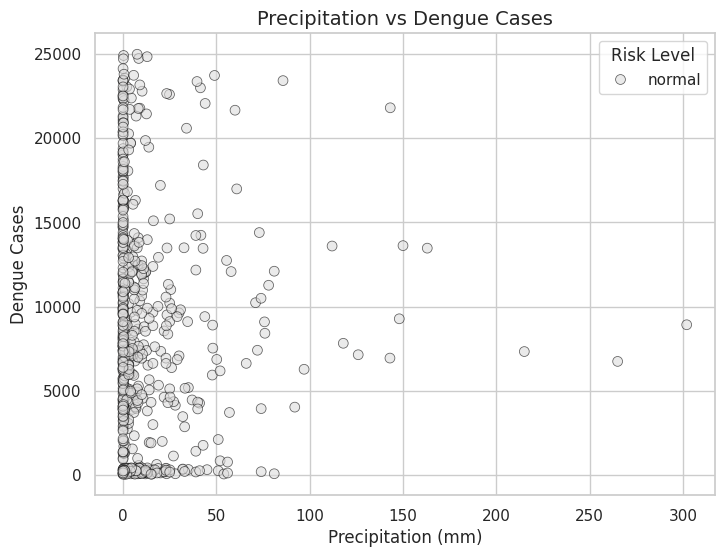

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='precip', y='cases', hue='labels', palette='coolwarm',
                alpha=0.6, edgecolor="black", s=50)

plt.xlabel("Precipitation (mm)", fontsize=12)
plt.ylabel("Dengue Cases", fontsize=12)
plt.title("Precipitation vs Dengue Cases", fontsize=14)
plt.legend(title="Risk Level", loc="upper right")

plt.grid(True)

# Se houver muita concentração nos primeiros valores de precipitação, testar log scale:
# plt.xscale("log")

plt.show()


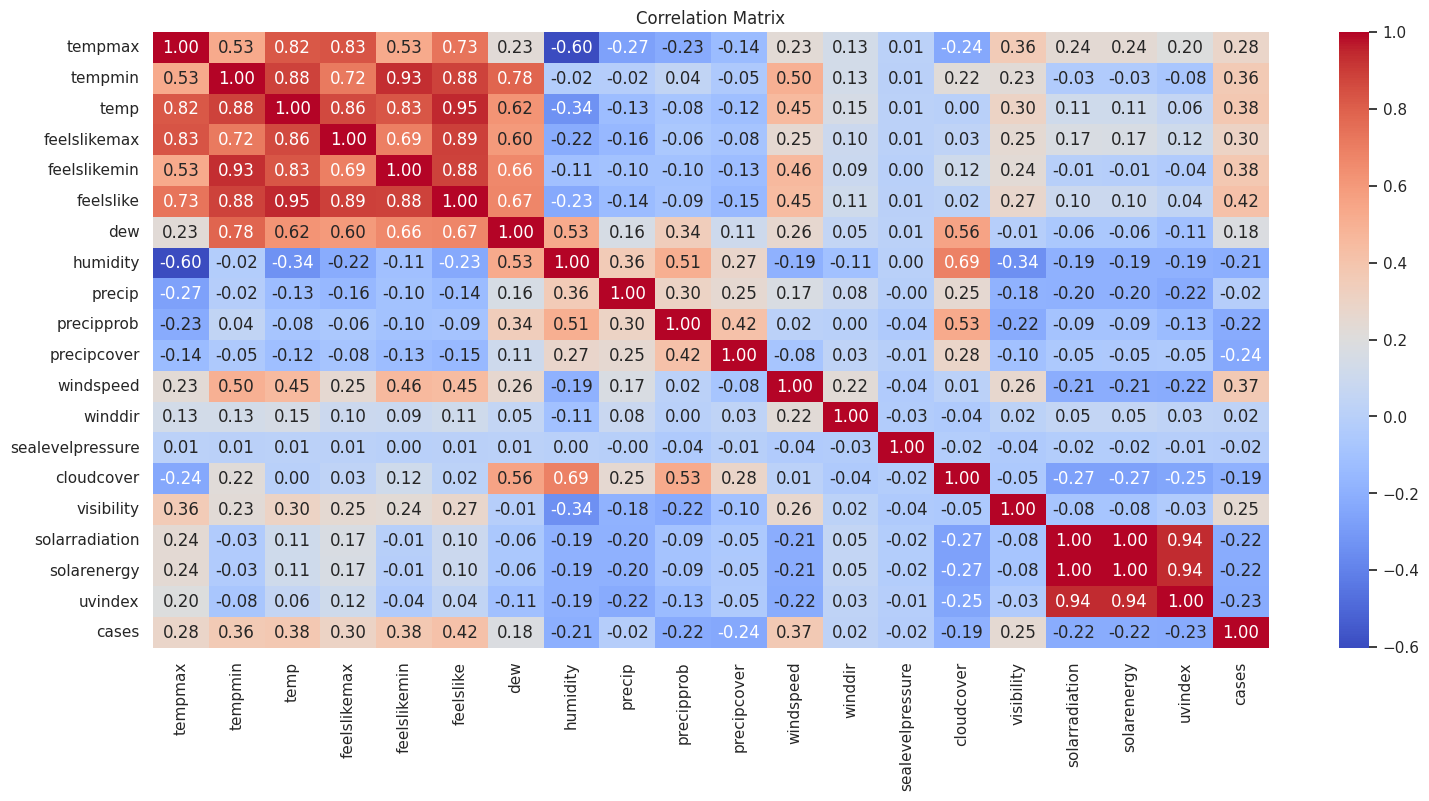

In [17]:
# Filter only numeric columns
numeric_columns = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike',
'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
'solarradiation', 'solarenergy', 'uvindex', 'cases']

numeric_df = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


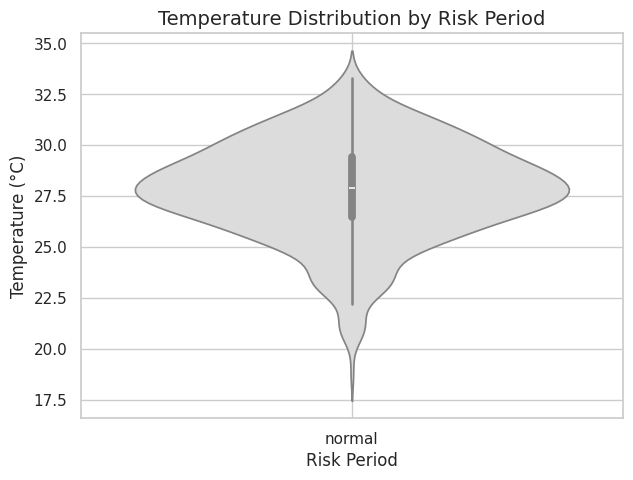

In [18]:
plt.figure(figsize=(7,5))
sns.violinplot(data=df, x='labels', y='temp', palette='coolwarm')

plt.title("Temperature Distribution by Risk Period", fontsize=14)
plt.xlabel("Risk Period", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)

plt.grid(True)
plt.show()

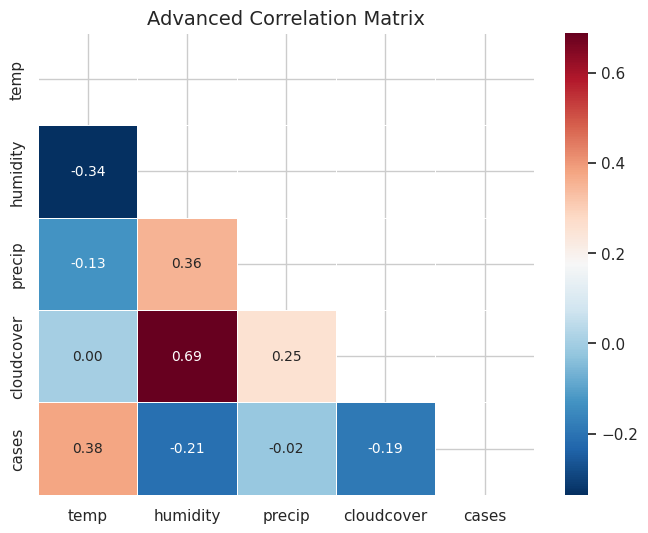

In [19]:
# Select variables for analysis
selected_features = ['temp', 'humidity', 'precip', 'cloudcover', 'cases']
correlation_matrix = df[selected_features].corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set figure size
plt.figure(figsize=(8,6))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='RdBu_r',
            fmt=".2f", linewidths=.5, cbar=True, annot_kws={"size":10})

# Add title
plt.title("Advanced Correlation Matrix", fontsize=14)

plt.show()


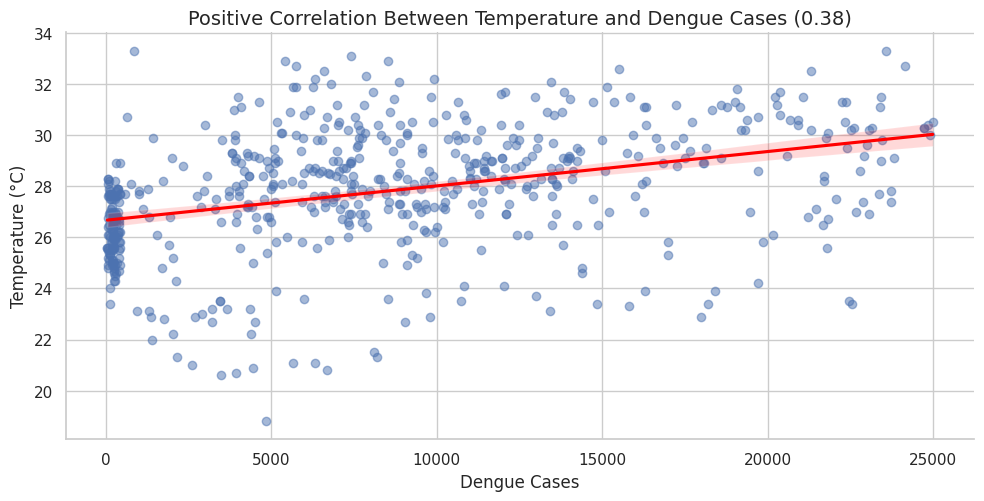

In [20]:
sns.lmplot(data=df, x='cases', y='temp', aspect=2,
           scatter_kws={"alpha":0.5}, line_kws={"color":"red"})

plt.xlabel("Dengue Cases", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.title("Positive Correlation Between Temperature and Dengue Cases (0.38)", fontsize=14)

plt.grid(True)
plt.show()


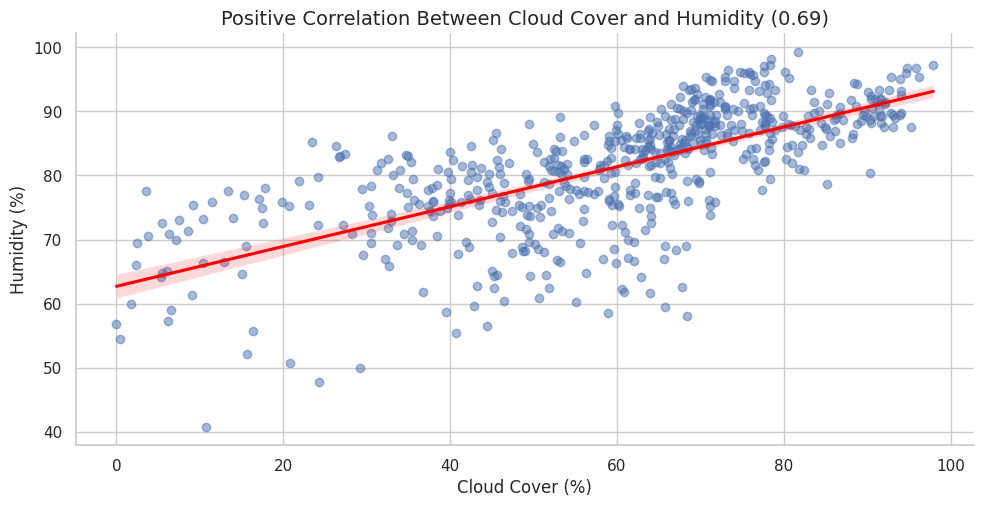

In [21]:
sns.lmplot(data=df, x='cloudcover', y='humidity', aspect=2,
           scatter_kws={"alpha":0.5}, line_kws={"color": "red"})

plt.xlabel("Cloud Cover (%)", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.title("Positive Correlation Between Cloud Cover and Humidity (0.69)", fontsize=14)

plt.grid(True)
plt.show()

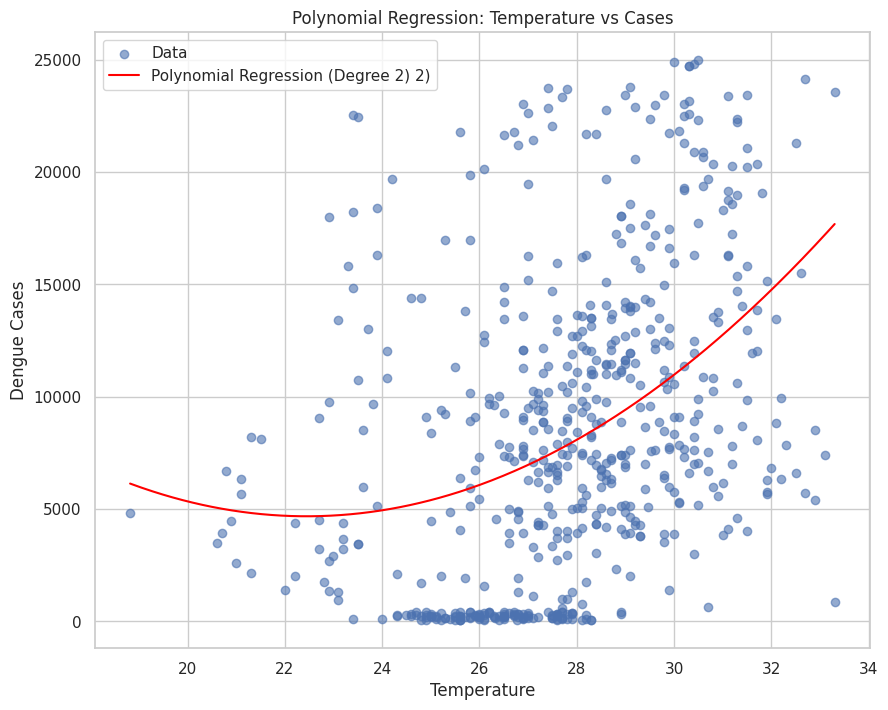

In [22]:
from numpy.polynomial.polynomial import Polynomial

# Fit a polynomial regression (degree 2)
x = df['temp']
y = df['cases']
coeffs = Polynomial.fit(x, y, deg=2).convert().coef

# Prediction
x_fit = np.linspace(min(x), max(x), 500)
y_fit = coeffs[0] + coeffs[1]*x_fit + coeffs[2]*x_fit**2

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, alpha=0.6, label='Data')
plt.plot(x_fit, y_fit, color='red', label='Polynomial Regression (Degree 2) 2)')
plt.title("Polynomial Regression: Temperature vs Cases")
plt.xlabel("Temperature")
plt.ylabel("Dengue Cases")
plt.legend()
plt.show()

In [23]:
# Create a sequence of daily dates from 2020-01-01 to 2024-12-31
date_range = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')

# Check if the number of dates matches the number of rows in the dataset
print("Number of dates generated:", len(date_range))
print("Number of rows in the dataset:", len(df))


Number of dates generated: 731
Number of rows in the dataset: 602


In [24]:
# Adjust the number of dates to the size of the dataset, if necessary
date_range = date_range[:len(df)]

# Add the date column to the DataFrame
df['date'] = date_range

# Set the date column as an index
df.set_index('date', inplace=True)

# Check the first few rows
df.tail()


serial  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
date                                                                     
2021-08-20     597     32.3     24.4  28.5          35.9          24.4   
2021-08-21     598     32.7     26.4  29.3          36.3          26.4   
2021-08-22     599     33.0     26.3  29.8          40.5          26.3   
2021-08-23     600     35.1     26.8  30.6          42.9          29.1   
2021-08-24     601     34.0     26.3  30.2          38.1          26.3   

            feelslike   dew  humidity  precip  precipprob  precipcover  snow  \
date                                                                           
2021-08-20       31.2  23.3      75.0     0.0         0.0          0.0   0.0   
2021-08-21       32.5  22.6      68.5     0.0         0.0          0.0   0.0   
2021-08-22       34.5  23.9      71.1     0.0         0.0          0.0   0.0   
2021-08-23       35.1  23.3      65.9     0.0         0.0          0.0   0.0   
2021-08-24       33.1  21.5      60.4     0.0         0.0          0.0   0.0   

            snowdepth  windspeed  winddir  sealevelpressure  cloudcover  \
date                                                                      
2021-08-20        0.0       17.1    159.8            1008.9        50.4   
2021-08-21        0.0       16.6    233.0            1010.4        50.5   
2021-08-22        0.0       19.0    344.4            1010.8        30.5   
2021-08-23        0.0       14.7     81.3            1009.7        32.7   
2021-08-24        0.0       17.8     79.2            1008.7        46.5   

            visibility  solarradiation  solarenergy  uvindex  conditions  \
date                                                                       
2021-08-20         3.1           252.5         21.9      9.0         1.0   
2021-08-21         3.1           242.7         20.9      8.0         1.0   
2021-08-22         3.1           195.3         16.9      8.0         1.0   
2021-08-23         3.3           187.6         16.0      7.0         1.0   
2021-08-24         3.9           136.2         11.7      5.0         1.0   

            stations    cases  labels  
date                                   
2021-08-20       1.0   6729.0  normal  
2021-08-21       1.0  10541.0  normal  
2021-08-22       1.0   6396.0  normal  
2021-08-23       1.0  10883.0  normal  
2021-08-24       1.0   7311.0  normal

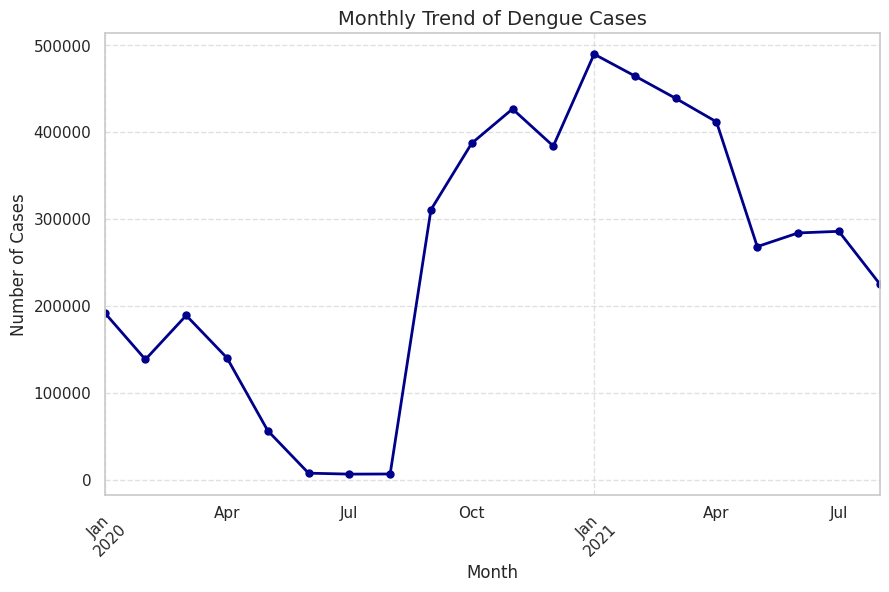

In [25]:
# Resample cases by month and plot
plt.figure(figsize=(10,6))
df['cases'].resample('M').sum().plot(color="darkblue", linewidth=2, marker="o", markersize=5)

# Improve title and labels
plt.title("Monthly Trend of Dengue Cases", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)

# Format x-axis dates
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


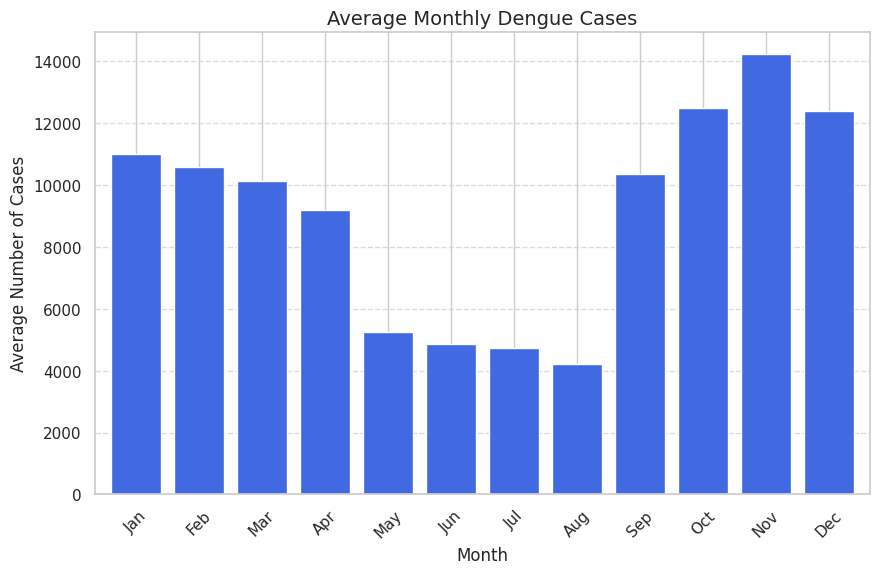

In [26]:
# Group by month (ignoring year) and calculate the mean
df_seasonal = df.groupby(df.index.month)['cases'].mean()

# Create bar chart for seasonality
plt.figure(figsize=(10,6))
df_seasonal.plot(kind='bar', color="royalblue", width=0.8)

# Improve labels and title
plt.title("Average Monthly Dengue Cases", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Number of Cases", fontsize=12)

# Fix x-axis labels
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)

# Add grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<Figure size 1200x600 with 0 Axes>

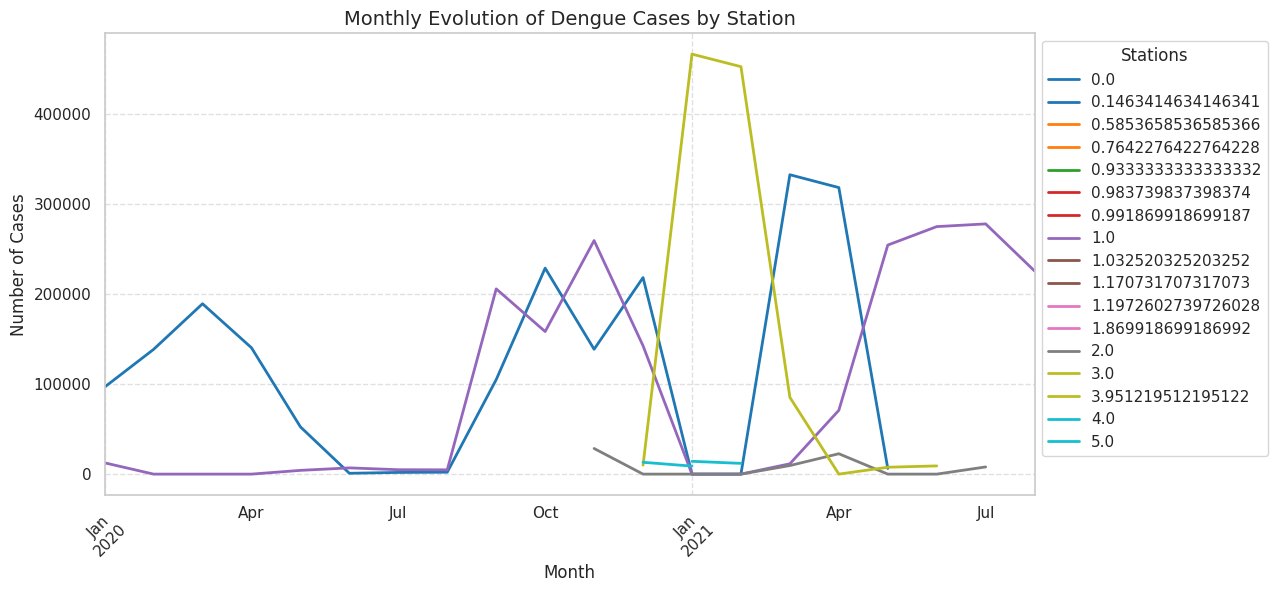

In [27]:
# Convert 'stations' to a string to avoid float values in legend
df['stations'] = df['stations'].astype(str)

# Group by station and resample cases monthly
stations_grouped = df.groupby('stations')['cases'].resample('M').sum()

# Unstack and plot time series for each station
plt.figure(figsize=(12,6))
ax = stations_grouped.unstack(level=0).plot(figsize=(12,6), colormap="tab10", linewidth=2)

# Improve title and labels
plt.title("Monthly Evolution of Dengue Cases by Station", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)

# Improve legend positioning
plt.legend(title="Stations", loc='upper left', bbox_to_anchor=(1,1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


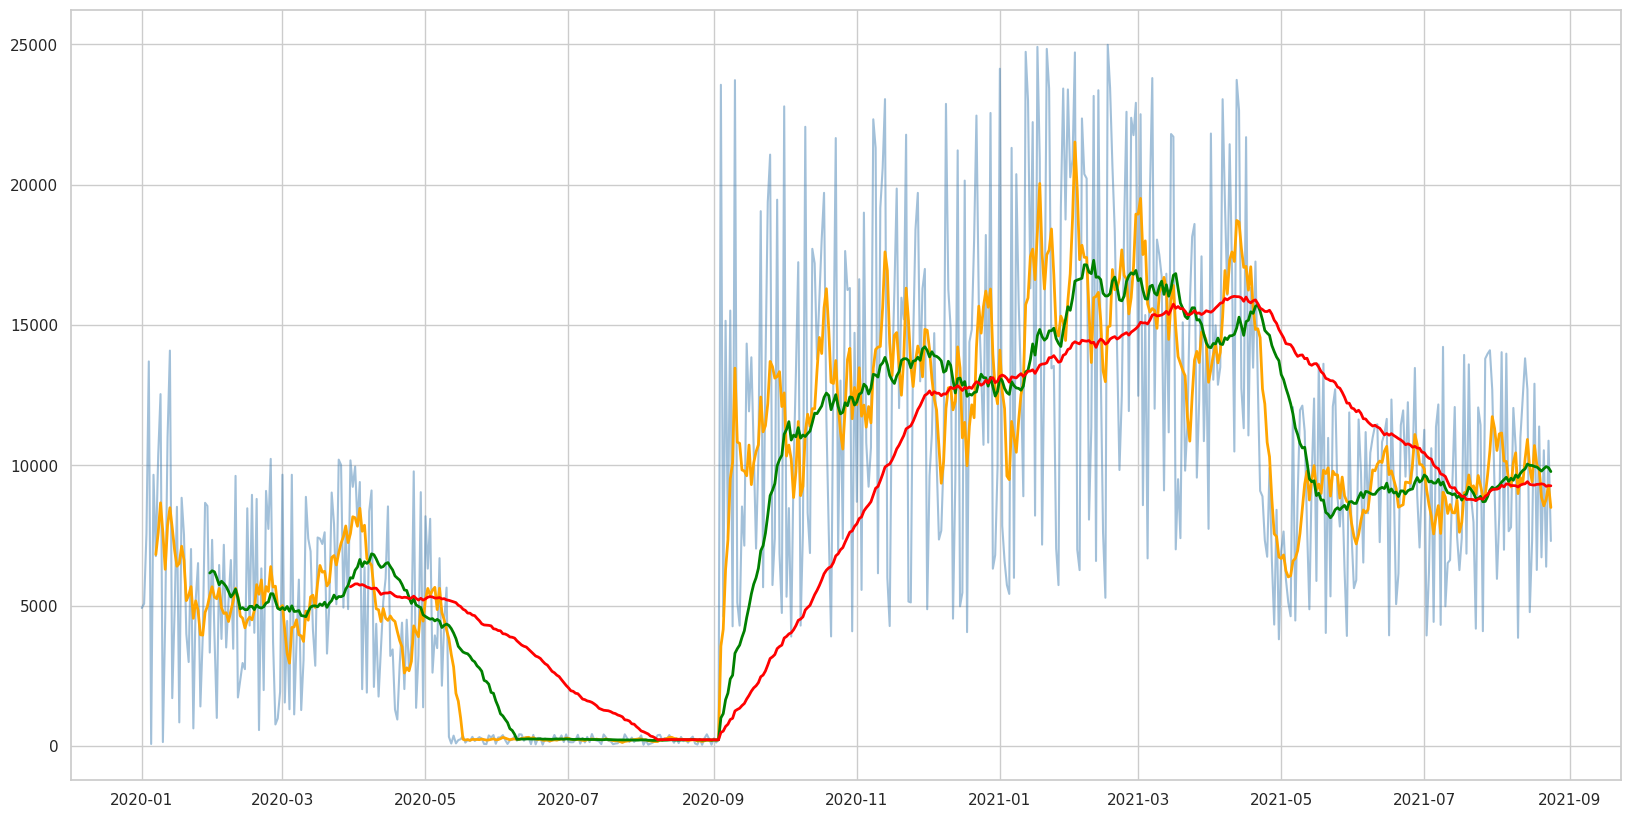

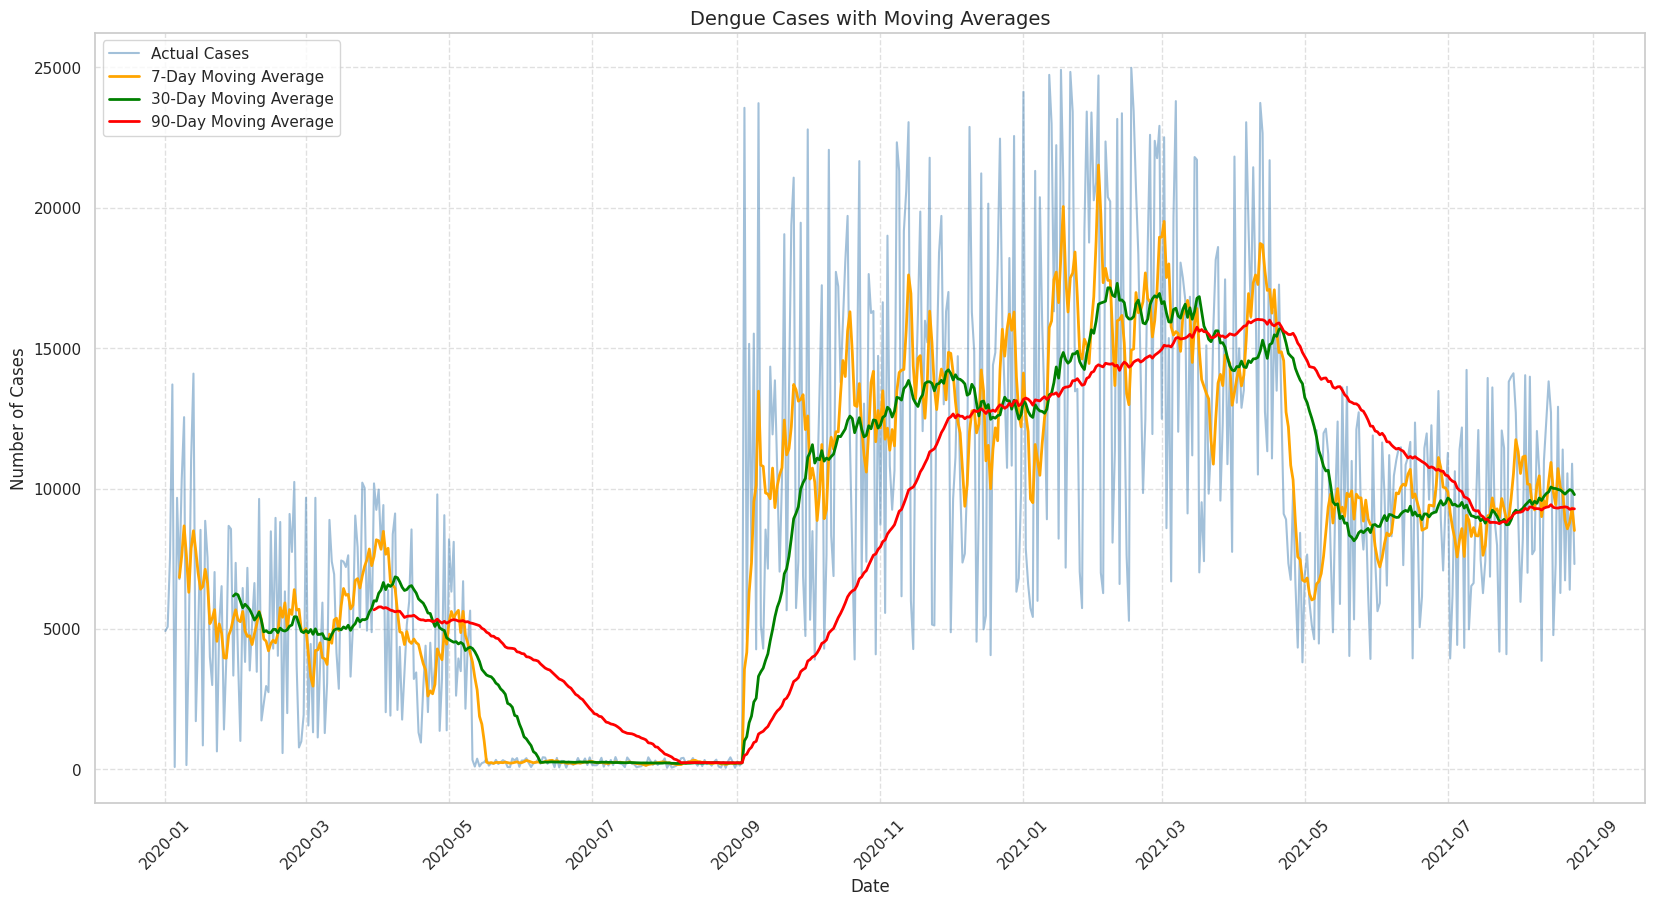

In [28]:
# Compute moving averages
df['ma_7'] = df['cases'].rolling(window=7).mean()
df['ma_30'] = df['cases'].rolling(window=30).mean()
df['ma_90'] = df['cases'].rolling(window=90).mean()

# Plot actual cases and moving averages
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['cases'], label='Actual Cases', color="steelblue", alpha=0.5)
plt.plot(df.index, df['ma_7'], label='7-Day Moving Average', color="orange", linewidth=2)
plt.plot(df.index, df['ma_30'], label='30-Day Moving Average', color="green", linewidth=2)
plt.plot(df.index, df['ma_90'], label='90-Day Moving Average', color="red", linewidth=2)
# Compute moving averages
df['ma_7'] = df['cases'].rolling(window=7).mean()
df['ma_30'] = df['cases'].rolling(window=30).mean()
df['ma_90'] = df['cases'].rolling(window=90).mean()

# Plot actual cases and moving averages
plt.figure(figsize=(20, 10))
plt.plot(df.index, df['cases'], label='Actual Cases', color="steelblue", alpha=0.5)
plt.plot(df.index, df['ma_7'], label='7-Day Moving Average', color="orange", linewidth=2)
plt.plot(df.index, df['ma_30'], label='30-Day Moving Average', color="green", linewidth=2)
plt.plot(df.index, df['ma_90'], label='90-Day Moving Average', color="red", linewidth=2)

# Improve labels and title
plt.title("Dengue Cases with Moving Averages", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=45)

# Improve legend placement
plt.legend(loc="upper left")

# Add grid for readability
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


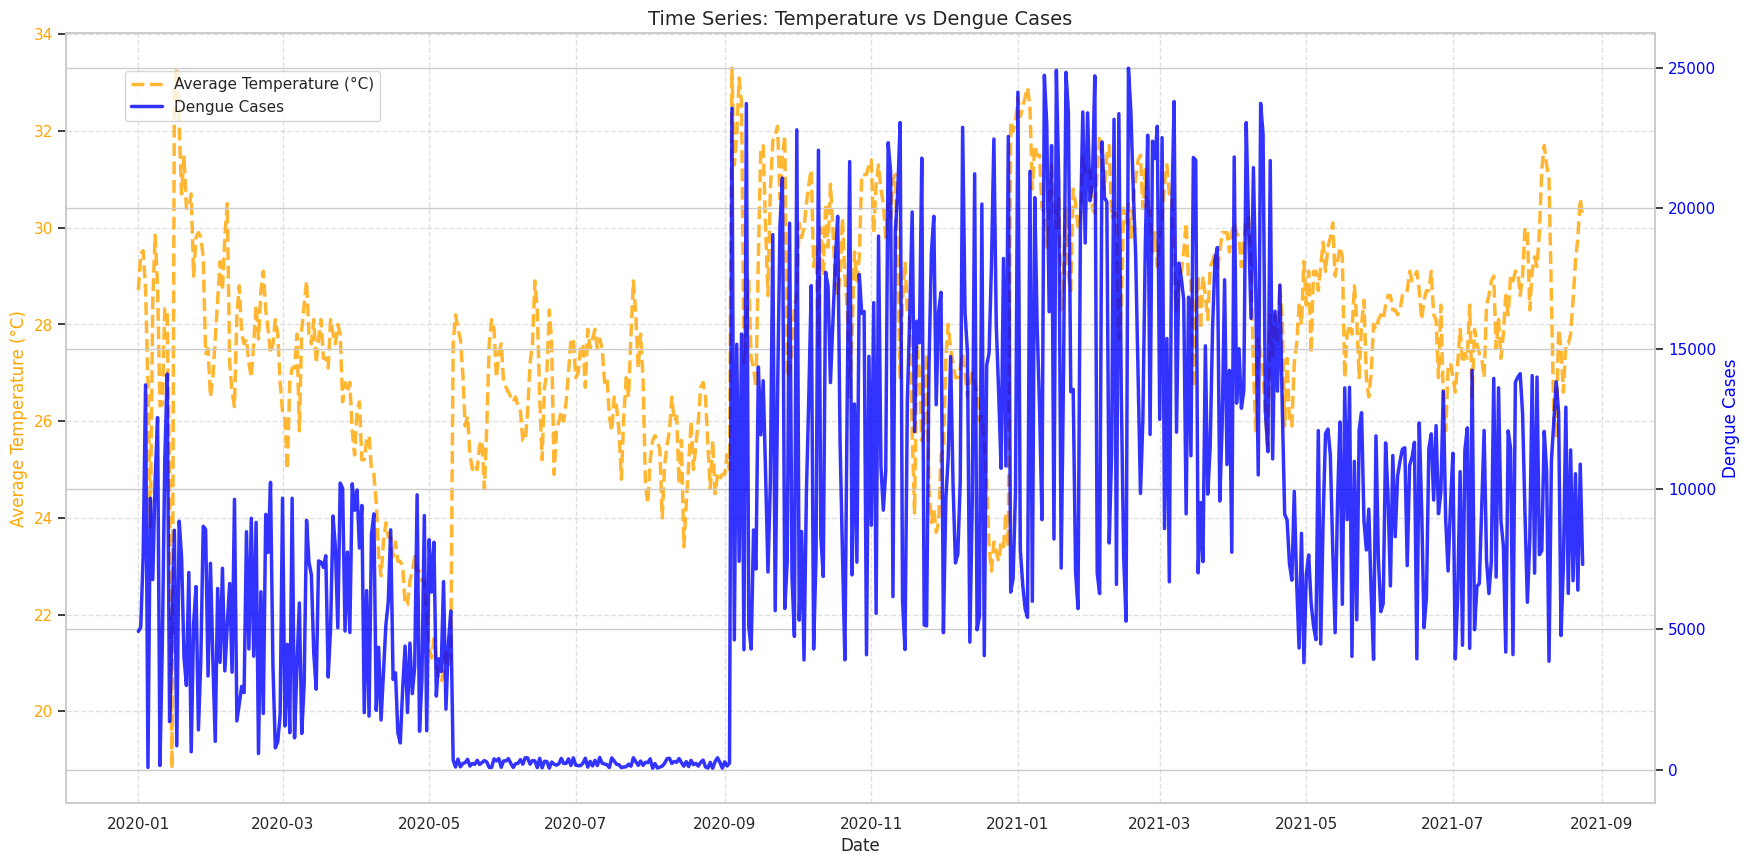

In [29]:
fig, ax1 = plt.subplots(figsize=(20.5, 10))

# Plot temperature (primary y-axis)
ax1.plot(df.index, df['temp'], label='Average Temperature (°C)',
         color='orange', linewidth=2.5, linestyle="dashed", alpha=0.8)

ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Average Temperature (°C)", color='orange', fontsize=12)
ax1.tick_params(axis='y', labelcolor='orange')

# Create a second y-axis for dengue cases
ax2 = ax1.twinx()
ax2.plot(df.index, df['cases'], label='Dengue Cases',
         color='blue', linewidth=2.5, alpha=0.8)

ax2.set_ylabel("Dengue Cases", color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')
# Add title and legends
plt.title("Time Series: Temperature vs Dengue Cases", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

# Improve grid visibility
ax1.grid(True, linestyle="--", alpha=0.6)

plt.show()

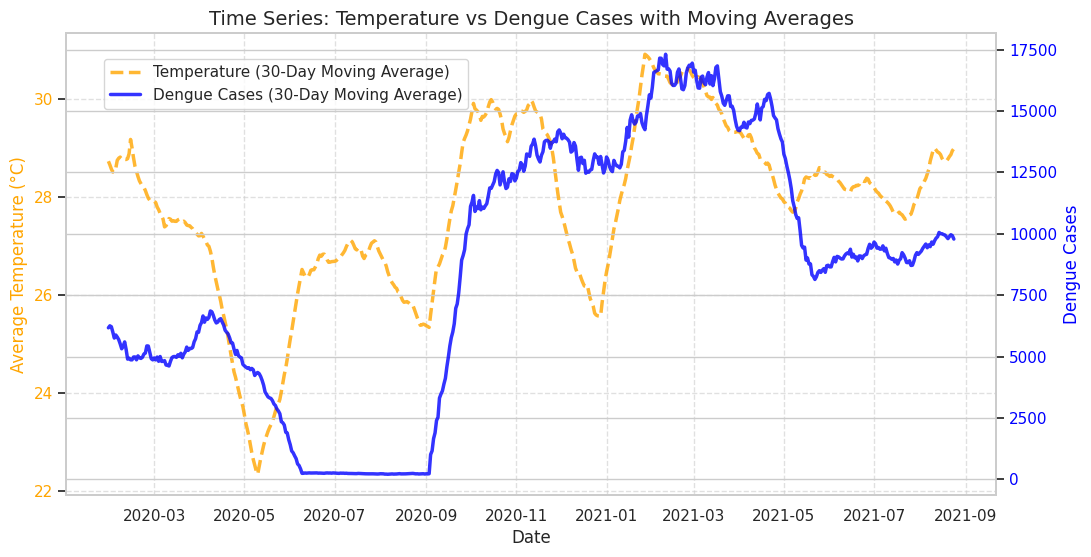

In [30]:
# Calculate moving averages
df['temp_ma_30'] = df['temp'].rolling(window=30).mean()
df['cases_ma_30'] = df['cases'].rolling(window=30).mean()

# Create figure and twin axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature with 30-day moving average
ax1.plot(df.index, df['temp_ma_30'], label="Temperature (30-Day Moving Average)",
         color='orange', linewidth=2.5, linestyle="dashed", alpha=0.8)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Average Temperature (°C)", color='orange', fontsize=12)
ax1.tick_params(axis='y', labelcolor='orange')
# Create a second y-axis for dengue cases
ax2 = ax1.twinx()
ax2.plot(df.index, df['cases_ma_30'], label="Dengue Cases (30-Day Moving Average)",
         color='blue', linewidth=2.5, alpha=0.8)
ax2.set_ylabel("Dengue Cases", color='blue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='blue')

# Add title and legends
plt.title("Time Series: Temperature vs Dengue Cases with Moving Averages", fontsize=14)
fig.legend(loc="upper left", bbox_to_anchor=(0.15, 0.85))

# Improve grid visibility
ax1.grid(True, linestyle="--", alpha=0.6)

plt.show()



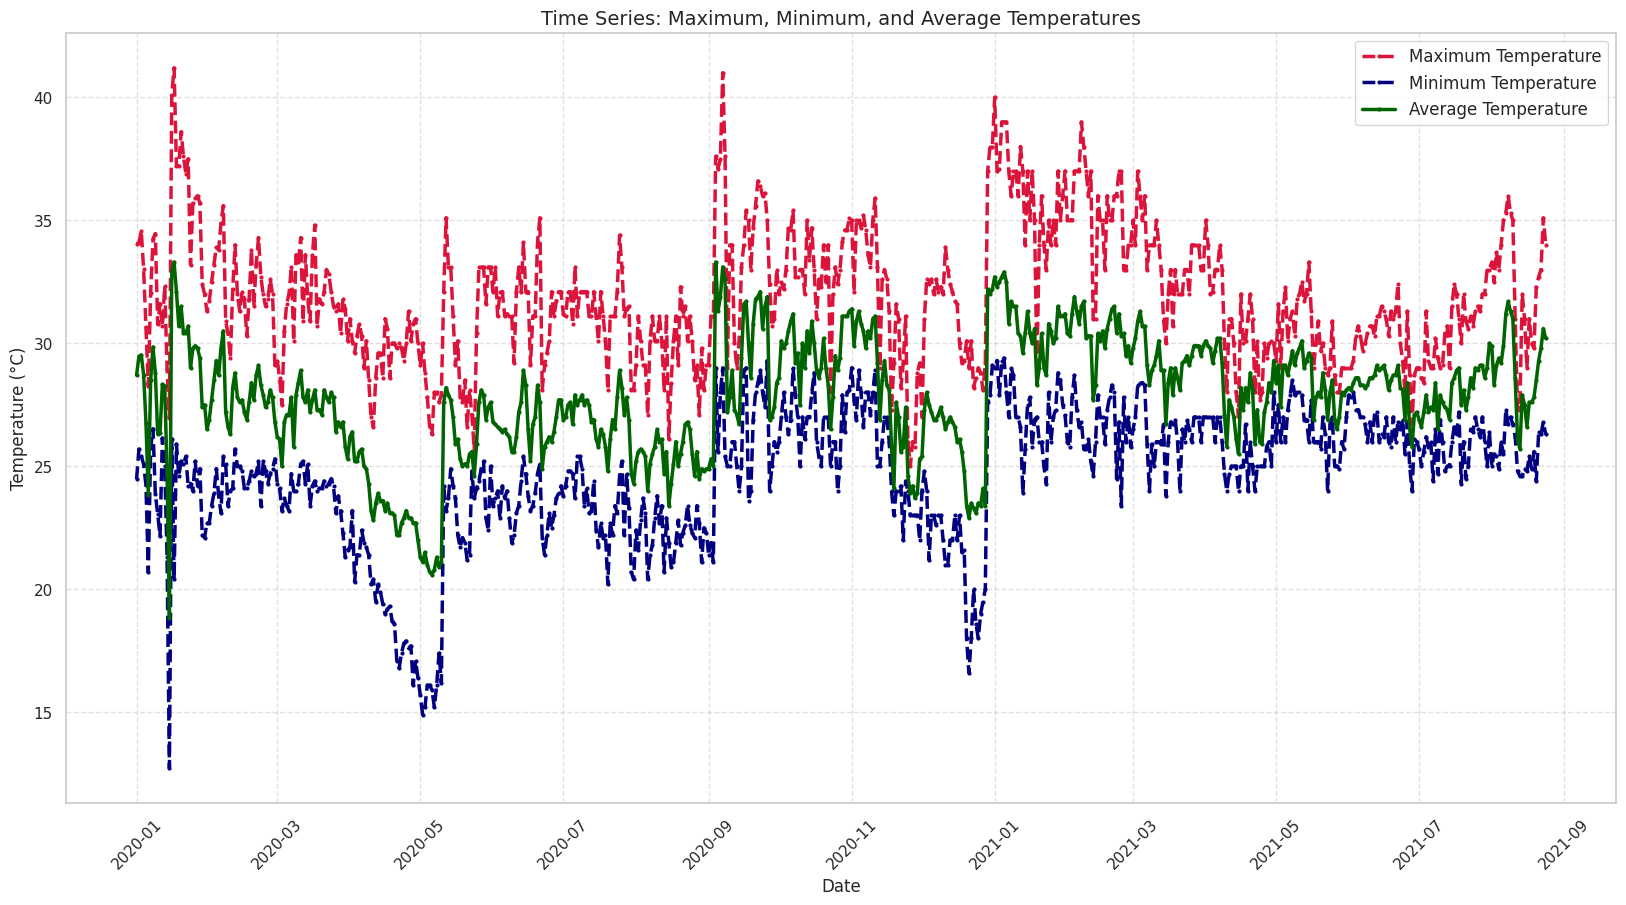

In [31]:
plt.figure(figsize=(20, 10))

# Plot maximum temperature
plt.plot(df.index, df['tempmax'], label='Maximum Temperature', color='crimson',
         linewidth=2.5, linestyle="dashed", marker='o', markersize=2)

# Plot minimum temperature
plt.plot(df.index, df['tempmin'], label='Minimum Temperature', color='navy',
         linewidth=2.5, linestyle="dashed", marker='o', markersize=2)

# Plot average temperature
plt.plot(df.index, df['temp'], label='Average Temperature', color='darkgreen',
         linewidth=2.5, marker='o', markersize=2)
# Add titles and labels
plt.title("Time Series: Maximum, Minimum, and Average Temperatures", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)

# Improve legend positioning
plt.legend(loc="upper right", fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

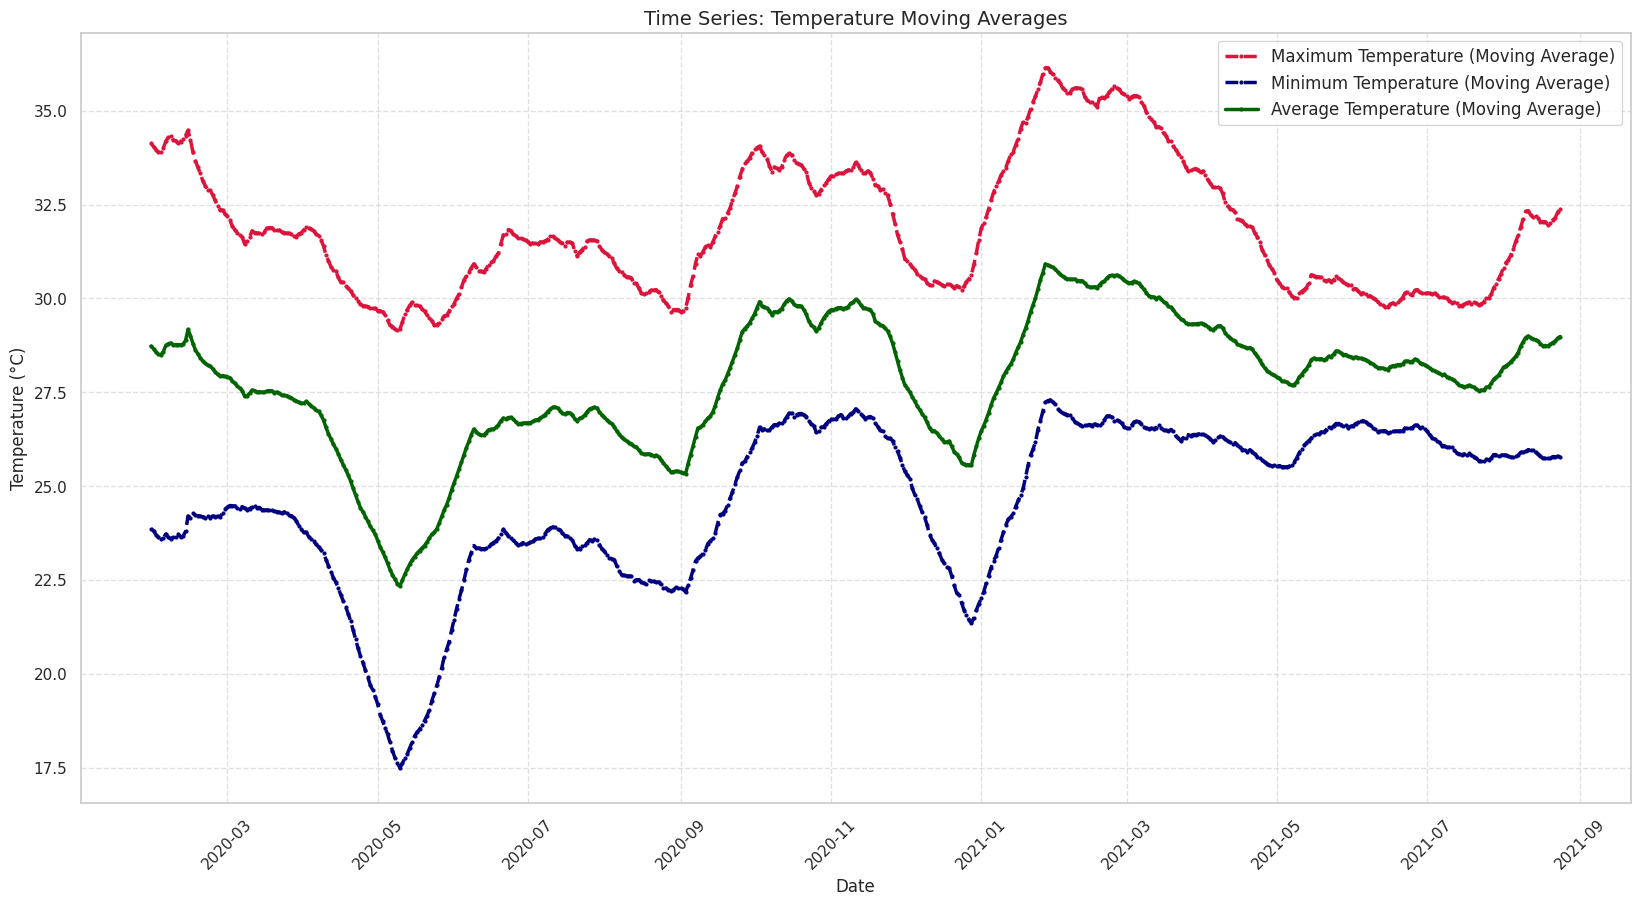

In [32]:
# Calculate moving averages
df['tempmax_ma'] = df['tempmax'].rolling(window=30).mean()
df['tempmin_ma'] = df['tempmin'].rolling(window=30).mean()
df['temp_ma'] = df['temp'].rolling(window=30).mean()

# Create figure
plt.figure(figsize=(20, 10))

# Plot maximum temperature moving average
plt.plot(df.index, df['tempmax_ma'], label="Maximum Temperature (Moving Average)",
         color='crimson', linewidth=2.5, linestyle="dashed", marker='o', markersize=2)

# Plot minimum temperature moving average
plt.plot(df.index, df['tempmin_ma'], label="Minimum Temperature (Moving Average)",
         color='navy', linewidth=2.5, linestyle="dashed", marker='o', markersize=2)
# Plot average temperature moving average
plt.plot(df.index, df['temp_ma'], label="Average Temperature (Moving Average)",
         color='darkgreen', linewidth=2.5, marker='o', markersize=2)

# Add titles and labels
plt.title("Time Series: Temperature Moving Averages", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)

# Improve legend positioning
plt.legend(loc="upper right", fontsize=12)

# Improve x-axis readability
plt.xticks(rotation=45)
# Add grid for better readability
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


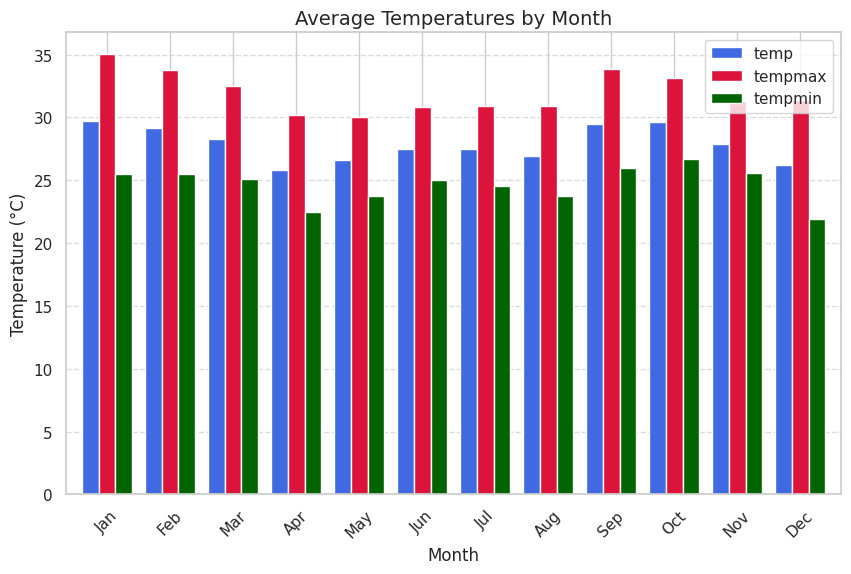

In [33]:
# Group by month and calculate average temperature
df_monthly = df.groupby(df.index.month)[['temp', 'tempmax', 'tempmin']].mean()

# Create bar chart
df_monthly.plot(kind='bar', figsize=(10, 6), width=0.8, color=['royalblue', 'crimson', 'darkgreen'])

# Improve title and labels
plt.title("Average Temperatures by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)

# Fix x-axis labels
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)

# Add grid for better readability
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [34]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
label_encoder = LabelEncoder()

# Apply the encoder to the 'labels' column
df['labels'] = label_encoder.fit_transform(df['labels'])

# Viewing
label_encoder


LabelEncoder()

In [36]:

# List of columns to delete
columns_to_drop = ['cases_rolling', 'ma_7', 'ma_30', 'ma_90', 'ma_30_centered',
'temp_ma_30', 'cases_ma_30', 'tempmax_ma', 'tempmin_ma',
'temp_ma']

# Delete the columns
df = df.drop(columns=columns_to_drop, errors='ignore') # 'errors=ignore' avoids errors if any column does not exist

# Check for updated DataFrame
df.head()

serial    tempmax    tempmin       temp  feelslikemax  \
date                                                                
2020-01-01       0  34.053151  24.478082  28.709863     39.757808   
2020-01-02       1  34.086179  25.694309  29.464228     41.338211   
2020-01-03       2  34.573984  25.417886  29.526829     40.464228   
2020-01-04       3  33.020325  25.080488  28.727642     37.878049   
2020-01-05       4  30.660976  24.230894  26.774797     36.586992   

            feelslikemin  feelslike        dew   humidity     precip  \
date                                                                   
2020-01-01     25.317808  32.306301  22.971233  73.508219   2.921726   
2020-01-02     28.140650  34.423577  23.484553  72.066667   3.783415   
2020-01-03     26.560163  33.085366  22.580488  69.424390   3.065854   
2020-01-04     26.193496  31.772358  21.752033  69.297561   6.025203   
2020-01-05     24.263415  28.943902  24.214634  86.652033  23.336585   

            precipprob  precipcover  snow  snowdepth  windspeed     winddir  \
date                                                                          
2020-01-01   44.657534     4.360932   0.0        0.0  15.678356  175.595342   
2020-01-02   39.837398     2.676748   0.0        0.0  14.574797  158.349593   
2020-01-03   33.333333     2.337805   0.0        0.0  14.978049  202.621138   
2020-01-04   37.398374     2.676667   0.0        0.0  16.504878  183.544715   
2020-01-05   96.747967    15.616992   0.0        0.0  19.546341  224.030081   

            sealevelpressure  cloudcover  visibility  solarradiation  \
date                                                                   
2020-01-01       1007.911781   50.747945    3.789863      208.097808   
2020-01-02       1003.533333   48.313821    2.884553      222.926016   
2020-01-03       1005.731707   55.621138    4.242276      229.413008   
2020-01-04       1003.359350   50.208130    2.991057      225.421951   
2020-01-05       1009.995935   45.542276    3.886992      176.598374   

            solarenergy   uvindex  conditions            stations    cases  \
date                                                                         
2020-01-01    17.973699  7.232877    2.558904  1.1972602739726028   4925.0   
2020-01-02    19.246341  7.504065    1.658537   0.991869918699187   5077.0   
2020-01-03    19.802439  7.829268    1.910569   1.170731707317073   7579.0   
2020-01-04    19.480488  7.593496    1.300813  0.1463414634146341  13706.0   
2020-01-05    15.261789  6.186992    0.967480   3.951219512195122     82.0   

            labels  
date                
2020-01-01       0  
2020-01-02       0  
2020-01-03       0  
2020-01-04       0  
2020-01-05       0

In [37]:
X = df[['temp', 'humidity', 'precip', 'cloudcover', 'solarradiation']]

# Target variable
y = df['cases']

In [39]:
X.shape,
y.shape


(602,)

In [40]:
from sklearn.model_selection import train_test_split

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print set sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Display selected features
print("Features selected for the model:", selected_features)

Training set size: 481
Test set size: 121
Features selected for the model: ['temp', 'humidity', 'precip', 'cloudcover', 'cases']


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features for selected columns up to degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

feature_names = poly.get_feature_names_out(X_train.columns)

# Get the coefficients of the trained model
coefficients = model.coef_

# Create a DataFrame to organize the importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients) # Use the absolute value of the coefficients
}).sort_values(by='Importance', ascending=False)

# Visualizing
importance_df.head(n=10)

Feature   Importance
0                 temp  4441.500672
2               precip  1029.546400
1             humidity   183.668995
4       solarradiation   179.119635
3           cloudcover    90.231713
5               temp^2    81.968664
7          temp precip    18.458671
8      temp cloudcover     9.677570
6        temp humidity     7.162957
9  temp solarradiation     5.211873

In [45]:
feature_names = poly.get_feature_names_out(X_train.columns)

# Get the coefficients of the trained model
coefficients = model.coef_

# Create a DataFrame to organize the importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients) # Use the absolute value of the coefficients
}).sort_values(by='Importance', ascending=False)

# Visualizing
importance_df.head(n=10)


Feature   Importance
0                 temp  4441.500672
2               precip  1029.546400
1             humidity   183.668995
4       solarradiation   179.119635
3           cloudcover    90.231713
5               temp^2    81.968664
7          temp precip    18.458671
8      temp cloudcover     9.677570
6        temp humidity     7.162957
9  temp solarradiation     5.211873

Top 10 Most Important Features:
               Feature   Importance
0                 temp  4441.500672
2               precip  1029.546400
1             humidity   183.668995
4       solarradiation   179.119635
3           cloudcover    90.231713
5               temp^2    81.968664
7          temp precip    18.458671
8      temp cloudcover     9.677570
6        temp humidity     7.162957
9  temp solarradiation     5.211873


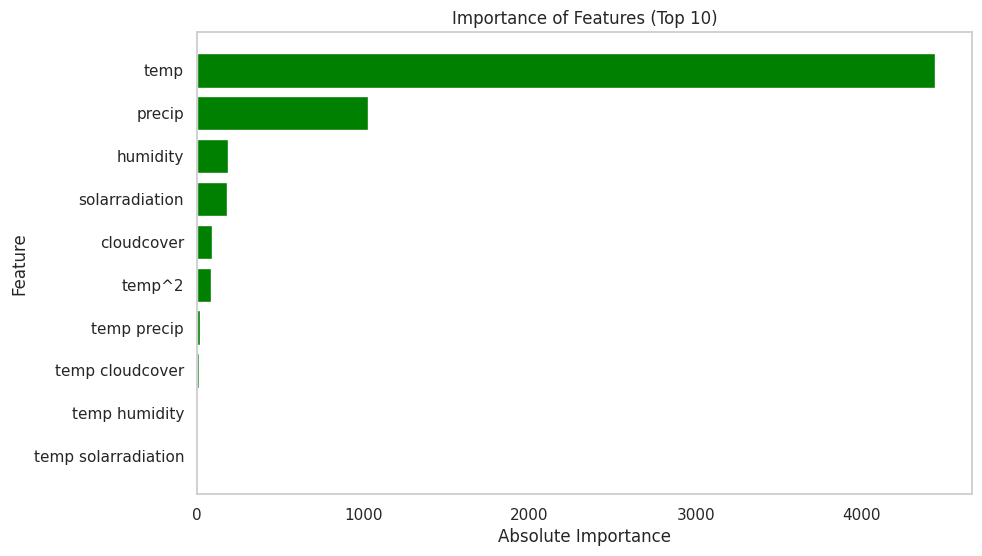

In [46]:
# Display top 10 features
print("Top 10 Most Important Features:")
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='green')
plt.xlabel("Absolute Importance")
plt.ylabel("Feature")
plt.title("Importance of Features (Top 10)")
plt.gca().invert_yaxis() # Invert Y-axis to sort from most important to least important
plt.grid(False)
plt.show()

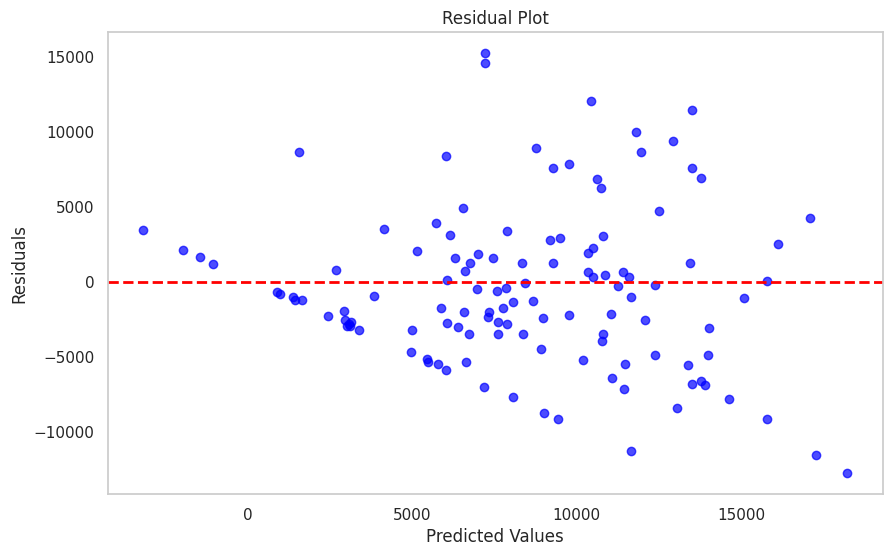

In [47]:
# Calculate residuals (difference between actual and predicted values)
y_pred = model.predict(X_test_poly) # Model predictions
residuals = y_test - y_pred # Residuals

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(False)
plt.show()

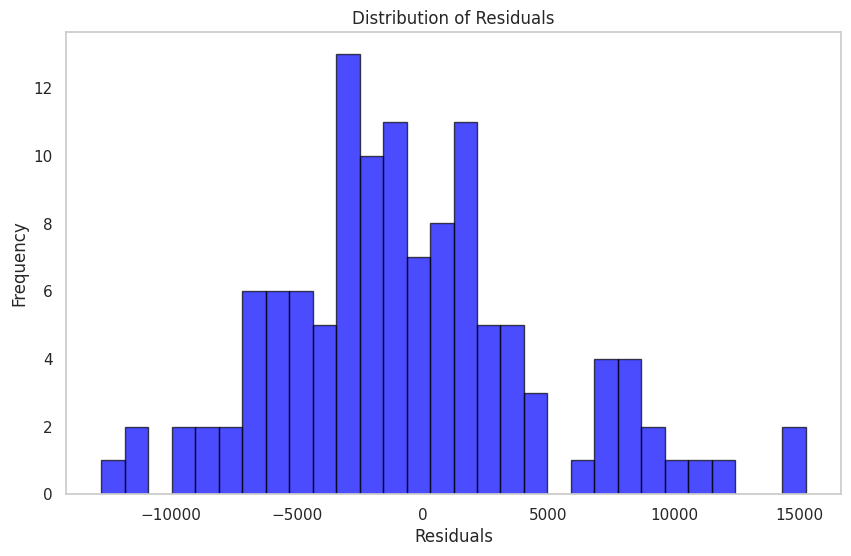

In [48]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

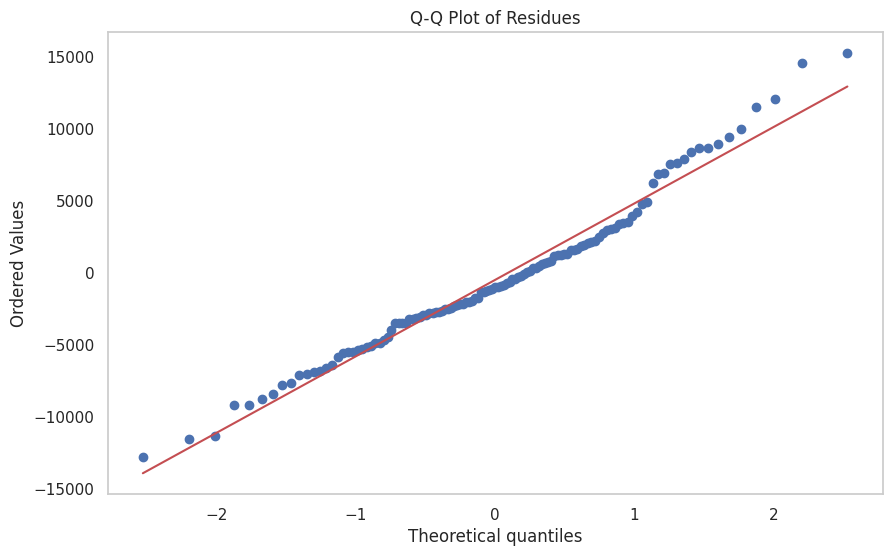

In [49]:
 import scipy.stats as stats

# Q-Q Plot Chart
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residues")
plt.grid()
plt.grid(False)
plt.show()

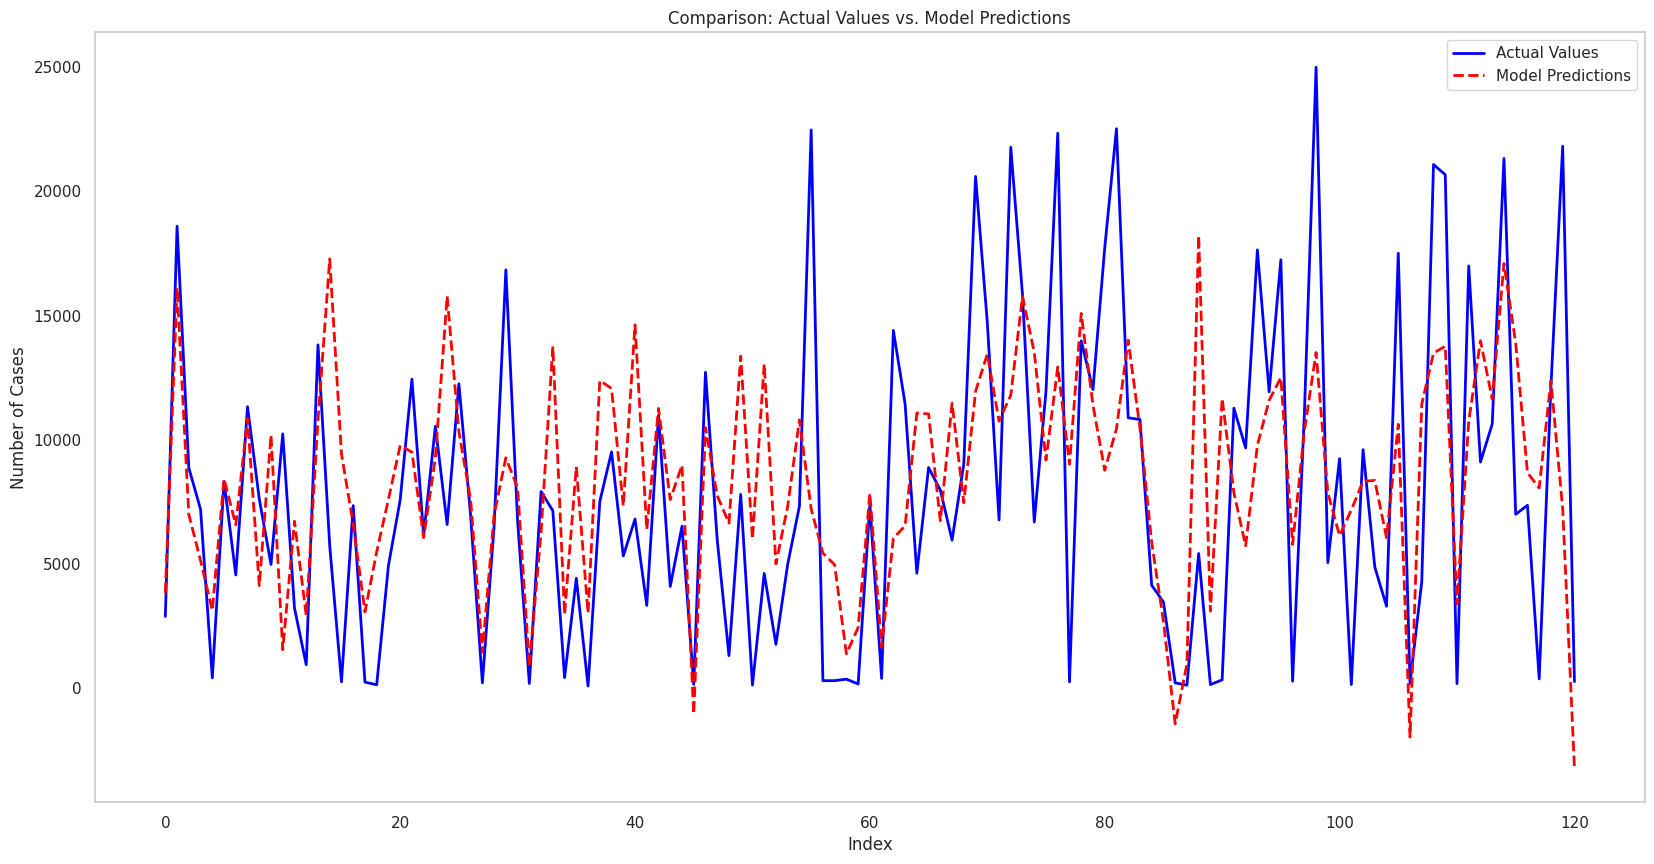

In [50]:
# Get model predictions
y_pred = model.predict(X_test_poly)

# Line plot for actual vs. predicted values
plt.figure(figsize=(20, 10))
plt.plot(y_test.values, label="Actual Values", color='blue', linewidth=2)
plt.plot(y_pred, label="Model Predictions", color='red', linestyle='--', linewidth=2)

plt.title("Comparison: Actual Values ​​vs. Model Predictions")
plt.xlabel("Index")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.grid(False)
plt.show()

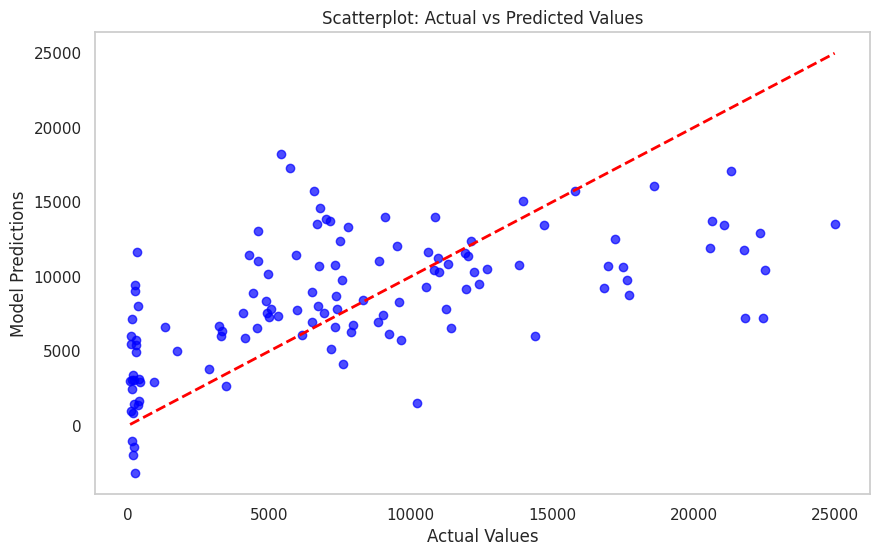

In [51]:
# Scatterplot for actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2) # Reference line

plt.title("Scatterplot: Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Model Predictions")
plt.grid(False)
plt.show()


In [52]:
# Replace 'temp' with your variable
X_single = X_train[['temp']]
y_single = y_train

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_single_poly = poly.fit_transform(X_single)

# Polynomial regression model
model = LinearRegression()
model.fit(X_single_poly, y_single)

# Create evenly spaced values ​​to plot the polynomial curve
X_range = np.linspace(X_single.min(), X_single.max(), 500).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# Make predictions for the curve
y_pred_range = model.predict(X_range_poly)


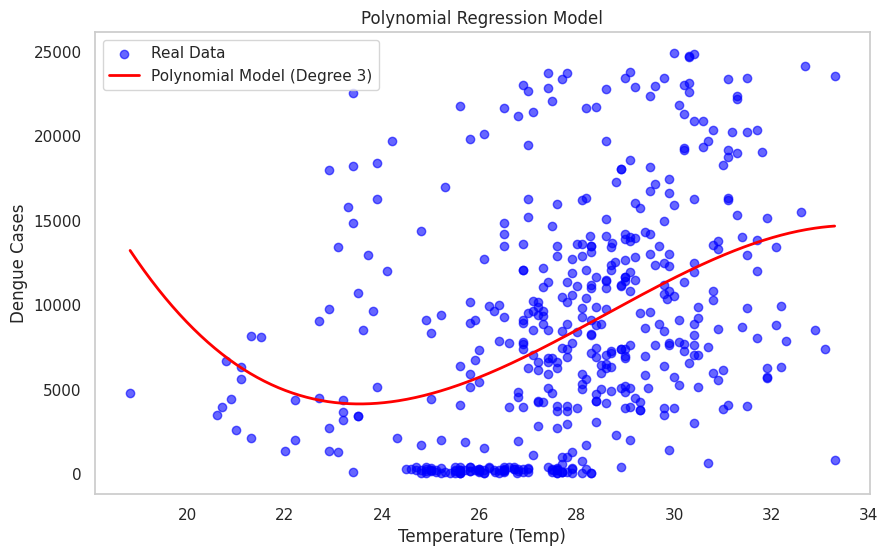

In [53]:
# Graph
plt.figure(figsize=(10, 6))

# Real data
plt.scatter(X_single, y_single, color='blue', alpha=0.6, label="Real Data")

# Curve fitted by the polynomial model
plt.plot(X_range, y_pred_range, color='red', linewidth=2, label="Polynomial Model (Degree 3)")

plt.title("Polynomial Regression Model")
plt.xlabel("Temperature (Temp)")
plt.ylabel("Dengue Cases")
plt.legend()
plt.grid(False)
plt.show()


In [56]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE After Normalization:", mse)
print("R² Score After Normalization:", r2)

MSE After Normalization: 28191772.39499519
R² Score After Normalization: 0.32161495908702376
